# PyLab 4 - Power Law
### Author: Ayush Pandhi (1003227457)
### Date: October 16, 2018

In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Defining the linear model function
def f(x, a, b):
    return b*x + np.log(a)

#Defining the exponential model function
def g(x, a, b):
    return a*(x**b)

In [3]:
#Loading the data and uncertainity
voltage = np.loadtxt('Lab 4 data.txt', skiprows=1, usecols=(0,))
current = (1/1000)*(np.loadtxt('Lab 4 data.txt', skiprows=1, usecols=(1,)))

#Finding max of precision and accuracy error for resistor data
v_error = np.empty(len(voltage))
for i in range(len(voltage)):
    v_error[i] = max(voltage[i]*0.0025, 0.01)
    
i_error = np.empty(len(current))
for i in range(len(current)):
    i_error[i] = max(current[i]*0.0075, 0.1/1000)

#Getting log values with errors
log_v = np.log(voltage)
log_i = np.log(current)
i_error_log = i_error/current

#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, log_v, log_i, (0.0085, 3/5), i_error_log, True) 
lin_output = f(log_v, p_opt_1[0], p_opt_1[1])

#Non-linear regression
p_opt_2, p_cov_2 = curve_fit(g, voltage, current, (1, 3/5), i_error, True) 
nonlin_output = g(voltage, p_opt_2[0], p_opt_2[1])

#Checking which fit's exponential is closer to the expected
print('The exponent using linear regression is', p_opt_1[1])
print('The exponent using nonlinear regression is', p_opt_2[1])
print('Linear fit power law is: I ~ V^' + str(p_opt_1[1]))
print('Non-linear fit power law is: I ~ V^' + str(p_opt_2[1]))

The exponent using linear regression is 0.5561683935758498
The exponent using nonlinear regression is 0.5561745988388914
Linear fit power law is: I ~ V^0.5561683935758498
Non-linear fit power law is: I ~ V^0.5561745988388914


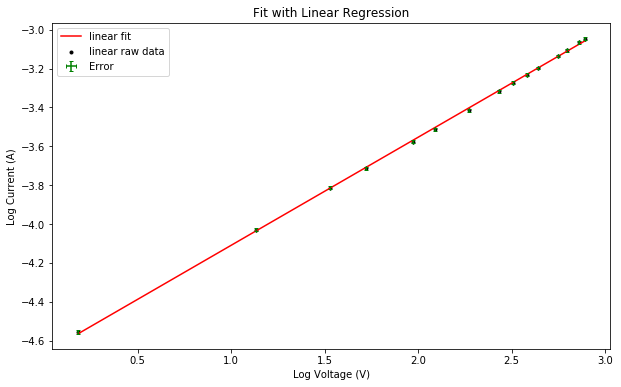

In [4]:
#Plots of linear regression
plt.figure(figsize=(10,6))
plt.scatter(log_v, log_i, label = 'linear raw data', marker='.', color='k')
plt.plot(log_v, lin_output, 'r-', label = 'linear fit')
plt.title('Fit with Linear Regression')
plt.xlabel('Log Voltage (V)')
plt.ylabel('Log Current (A)')
plt.errorbar(log_v, log_i, xerr=0, yerr=i_error_log, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

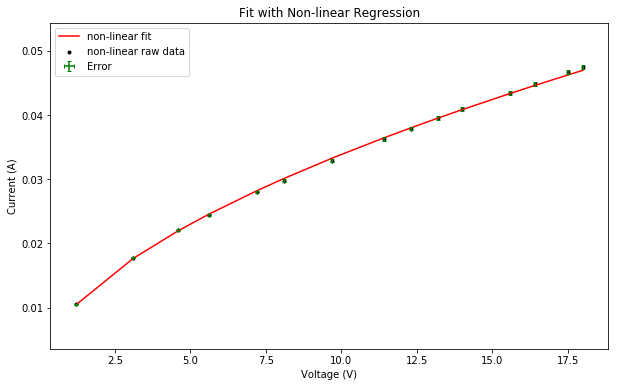

In [5]:
#Plots of non-linear regression
plt.figure(figsize=(10,6))
plt.scatter(voltage, current, label = 'non-linear raw data', marker='.', color='k')
plt.plot(voltage, nonlin_output, 'r-', label = 'non-linear fit')
plt.title('Fit with Non-linear Regression')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.errorbar(voltage, current, xerr=0, yerr=i_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

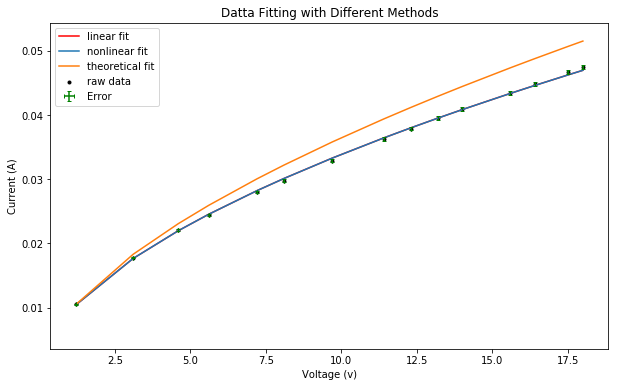

In [6]:
#Overplotting linear fit, non-linear fit and theorethical
plt.figure(figsize=(10,6))

#Raw data
plt.scatter(voltage, current, label = 'raw data', marker='.', color='k')

#Linear fit
lin_fit = p_opt_1[0]*voltage**(p_opt_1[1])
plt.plot(voltage, lin_fit, 'r-', label='linear fit')

#Nonlinear fit
nonlin_fit = p_opt_2[0]*voltage**(p_opt_2[1])
plt.plot(voltage, nonlin_fit, label='nonlinear fit')

#Theoretical fit
theo_fit = p_opt_2[0]*voltage**0.5882
plt.plot(voltage, theo_fit, label='theoretical fit') 
plt.title('Datta Fitting with Different Methods')
plt.xlabel('Voltage (v)')
plt.ylabel('Current (A)')
plt.errorbar(voltage, current, xerr=0, yerr=i_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

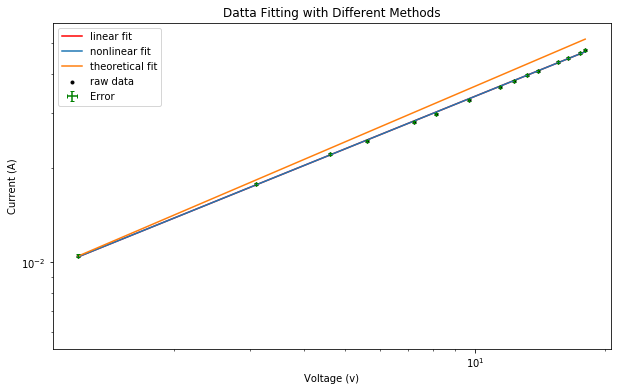

In [7]:
#Overplotting linear fit, non-linear fit and theorethical
plt.figure(figsize=(10,6))

#Raw data
plt.scatter(voltage, current, label = 'raw data', marker='.', color='k')

#Linear fit
lin_fit = p_opt_1[0]*voltage**(p_opt_1[1])
plt.plot(voltage, lin_fit, 'r-', label='linear fit')

#Nonlinear fit
nonlin_fit = p_opt_2[0]*voltage**(p_opt_2[1])
plt.plot(voltage, nonlin_fit, label='nonlinear fit')

#Theoretical fit
theo_fit = p_opt_2[0]*voltage**0.5882
plt.plot(voltage, theo_fit, label='theoretical fit') 
plt.title('Datta Fitting with Different Methods')
plt.xlabel('Voltage (v)')
plt.ylabel('Current (A)')
plt.xscale('log')
plt.yscale('log')
plt.errorbar(voltage, current, xerr=0, yerr=i_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

In [8]:
#Standard deviations for each model and parameter
sigma_a1 = np.sqrt(p_cov_1[0,0])
sigma_b1 = np.sqrt(p_cov_1[1,1])
sigma_a2 = np.sqrt(p_cov_2[0,0])
sigma_b2 = np.sqrt(p_cov_2[1,1])
print('Standard deviation for parameter a for linear regression is', sigma_a1)
print('Standard deviation for parameter b for linear regression is', sigma_b1)
print('Standard deviation for parameter a for nonlinear regression is', sigma_a2)
print('Standard deviation for parameter b for nonlinear regression is', sigma_b2)

#Calculating chi squared
chi_sq_1 = (1/13)*(np.sum(((log_i - lin_output) / i_error_log)**2))
print('chi squared for linear regression is', chi_sq_1)
chi_sq_2 = (1/13)*(sum(((current - nonlin_output) / i_error)**2))
print('chi squared for nonlinear regression is', chi_sq_2)

Standard deviation for parameter a for linear regression is 6.401137040894544e-05
Standard deviation for parameter b for linear regression is 0.00294752929143477
Standard deviation for parameter a for nonlinear regression is 6.437022011377621e-05
Standard deviation for parameter b for nonlinear regression is 0.0029658364853175456
chi squared for linear regression is 1.037133473943359
chi squared for nonlinear regression is 1.0384513980160774
